In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/readme.html


In [2]:
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#normalization
def normalize(a):
    norm = (a - np.amin(a)) / (np.amax(a) - np.amin(a))
    norm = 2 * norm - 1
    print('min of array: ',np.amin(a))
    print('max of array: ',np.amax(a))
    return norm

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# imbalance distribution
# training data
imb_list = [
    4500,
    2000,
    1000,
    800,
    600,
    500,
    400,
    250,
    150,
    80, ] 

'''# imbalance data for imbalanced test
imb_list = [
    1000,
    500,
    250,
    187,
    125,
    87,
    50,
    25,
    15,
    10, ] '''

'''# balance data for balanced test
imb_list = [
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000, ] '''

# small training data
'''imb_list = [
    350,
    200,
    100,
    80,
    60,
    50,
    40,
    25,
    15,
    8, ] '''

# KFold Parameter
args = {}
args['k'] = 5
args['seed'] = 41

['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'finch_s_000494.png'
(3, 32, 32)
(32, 32, 3)
bird


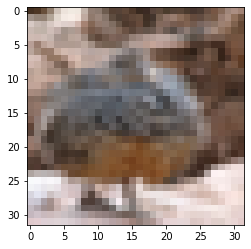

In [3]:
# Read Input Data
path = '/kaggle/input/cifar10-tar-gz/cifar-10-batches-py'
files = os.listdir(path)
files.sort()
print(files)

file = os.path.join(path, files[1])
#file = os.path.join(path, files[7]) # for testset data
data_dict = unpickle(file)
print(data_dict.keys())

# Draw a picture
n = 356
image = data_dict[b'data'][n]
label = data_dict[b'labels'][n]
print(data_dict[b'filenames'][n])
image_cf = image.reshape(3,32,32)
print(image_cf.shape)
image_cl = np.moveaxis(image_cf, 0, -1)
print(image_cl.shape)
print(classes[label])
plt.imshow(image_cl)

In [4]:

# Merge data array and label array

file = os.path.join(path, files[1])
#file = os.path.join(path, files[7]) # for testset data
print(file)
data_dict = unpickle(file)
data_arr = data_dict[b'data']
label_arr = np.array(data_dict[b'labels'])
print(data_arr.shape)
print(label_arr.shape)

for i in range(4):
    file = os.path.join(path, files[i+2])
    print(file)
    data_dict = unpickle(file)
    data_arr = np.append(data_arr, data_dict[b'data'], axis=0)
    label_arr = np.append(label_arr, np.array(data_dict[b'labels']), axis=0)
    
print(data_arr.shape)
print(label_arr.shape) 

m=0
img = data_arr[m]
print('img max before norm: ',img.max())
print('img min before norm: ',img.min())

# Normalize
data_arr = normalize(data_arr)

n=0
img = data_arr[n]
print('img max after norm: ',img.max())
print('img min after norm: ',img.min())

/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_1
(10000, 3072)
(10000,)
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-tar-gz/cifar-10-batches-py/data_batch_5
(50000, 3072)
(50000,)
img max before norm:  255
img min before norm:  0
min of array:  0
max of array:  255
img max after norm:  1.0
img min after norm:  -1.0


In [5]:
# KFold
kf = KFold(n_splits=args['k'], shuffle=True, random_state=args['seed'])

for k, (train_idx, valid_idx) in enumerate(kf.split(data_arr, label_arr)):
    print('{} Fold Start...'.format(k))
    data_train_fold = data_arr[train_idx]
    print(data_train_fold.shape)
    data_valid_fold = data_arr[valid_idx]
    print(data_valid_fold.shape)
    label_train_fold = label_arr[train_idx]
    label_valid_fold = label_arr[valid_idx]
    fname_dtf = str(k) + '_train_data.gz'
    fname_dvf = str(k) + '_valid_data.gz'
    fname_ltf = str(k) + '_train_label.gz'
    fname_lvf = str(k) + '_valid_label.gz'
    np.savetxt(fname_dtf, data_train_fold)
    np.savetxt(fname_dvf, data_valid_fold)
    np.savetxt(fname_ltf, label_train_fold)
    np.savetxt(fname_lvf, label_valid_fold)
    print('{} Fold End...'.format(k))
    
print('Done.')
    


0 Fold Start...
(40000, 3072)
(10000, 3072)
0 Fold End...
1 Fold Start...
(40000, 3072)
(10000, 3072)
1 Fold End...
2 Fold Start...
(40000, 3072)
(10000, 3072)
2 Fold End...
3 Fold Start...
(40000, 3072)
(10000, 3072)
3 Fold End...
4 Fold Start...
(40000, 3072)
(10000, 3072)
4 Fold End...
Done.
